In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [ ]:
df.isnull().sum()

,0
FireplaceQu,690
GarageQual,81
SalePrice,0


Text(0, 0.5, 'Count')

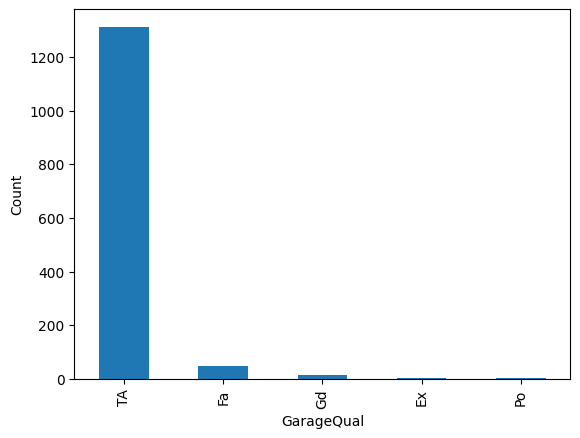

In [ ]:
df['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Count')

In [ ]:
df['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'Garagequal')

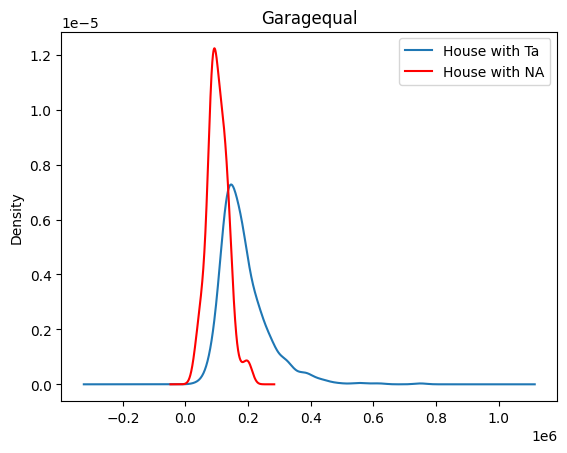

In [ ]:
#kde,pdf plot
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax)
df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with Ta', 'House with NA']
ax.legend(lines,labels,loc='best')

plt.title('Garagequal')

#blue is less peaked as compare to missing

In [ ]:
#replace missing with mode
temp = df[df['GarageQual']=='TA']['SalePrice']
df['GarageQual'].fillna('TA', inplace=True)


/tmp/ipython-input-213918995.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA', inplace=True)


<Axes: xlabel='GarageQual'>

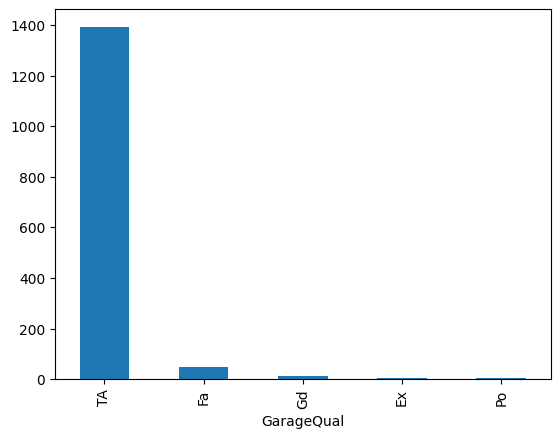

In [ ]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Garagequal')

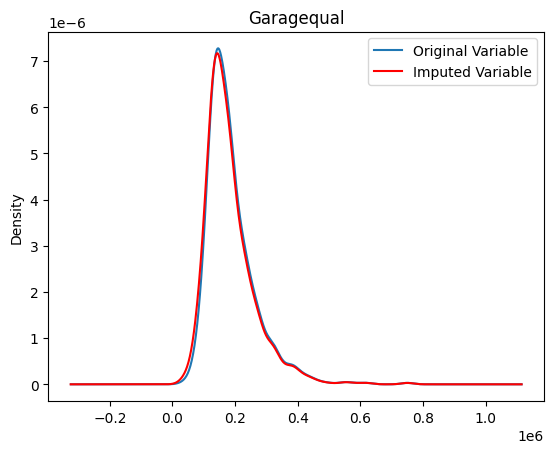

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde',ax = ax)
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde',ax=ax,color='red')
#df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('Garagequal')

#both match as missing value are less

<Axes: xlabel='FireplaceQu'>

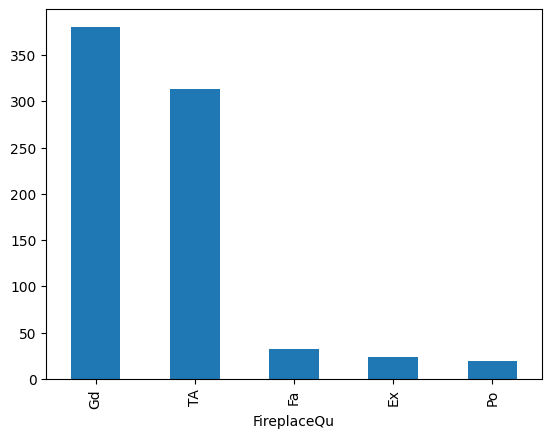

In [ ]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [ ]:
df['FireplaceQu'].mode()

,FireplaceQu
0,Gd


Text(0.5, 1.0, 'FireplaceQu')

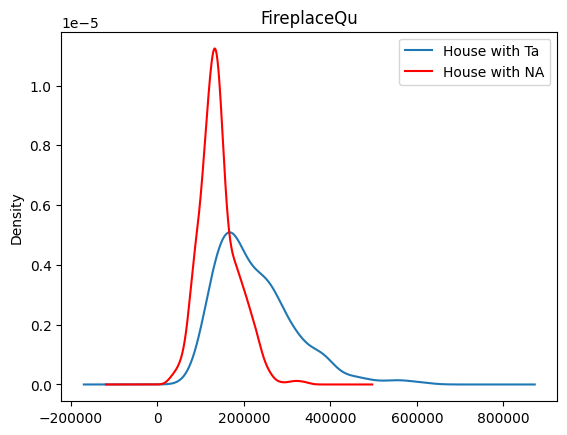

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax)
df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['House with Ta', 'House with NA']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

#

/tmp/ipython-input-3410536703.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['FireplaceQu'].fillna('Gd', inplace=True)


<Axes: xlabel='FireplaceQu'>

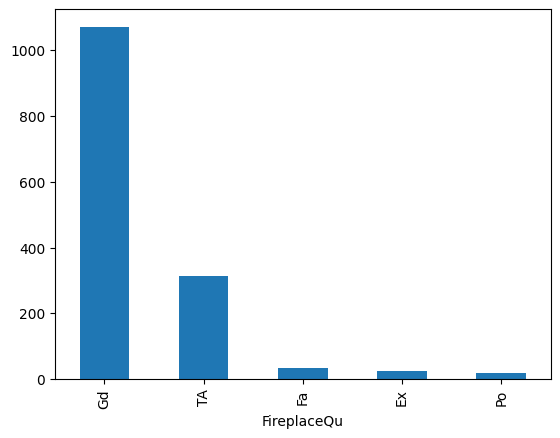

In [ ]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']
df['FireplaceQu'].fillna('Gd', inplace=True)
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

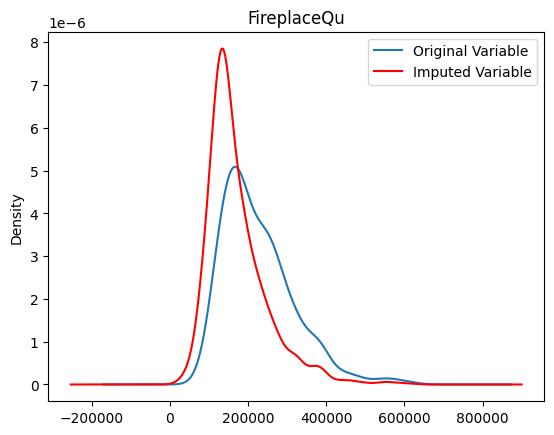

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)


temp.plot(kind='kde',ax = ax)
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde',ax=ax,color='red')
#df[df['GarageQual'].isnull()]['SalePrice'].plot(kind='kde',ax=ax,color='red')

lines,labels = ax.get_legend_handles_labels()
labels = ['Original Variable', 'Imputed Variable']
ax.legend(lines,labels,loc='best')

plt.title('FireplaceQu')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy = 'most_frequent')

In [ ]:
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

In [ ]:
imputer.statistics_

array(['Gd', 'TA'], dtype=object)

In [ ]:
x_train

array([['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ...,
       ['Gd', 'TA'],
       ['Gd', 'TA'],
       ['Gd', 'TA']], dtype=object)

In [ ]:
df = pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
df['GarageQual'].fillna('Missing',inplace=True)

/tmp/ipython-input-3265589431.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('Missing',inplace=True)


In [ ]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'Missing', 'Ex', 'Po'], dtype=object)

<Axes: xlabel='GarageQual'>

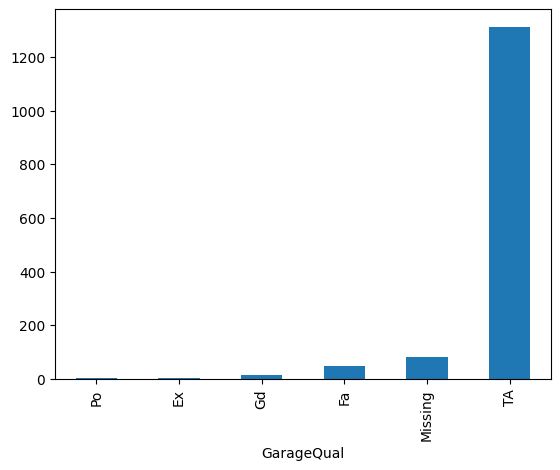

In [ ]:
df['GarageQual'].value_counts().sort_values().plot.bar()